## OOI Lab Manual 2025: Lab 12 Forest Fires

This notebook demonstrates how to access and process the dataset used in *Lab 12 Forest Fires* in the 2025 edition of the *OOI Lab Manual*.

By Sage Lichtenwalner, Rutgers University

Revised: December 10, 2024

In [1]:
# Notebook Setup
from erddapy import ERDDAP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

For this lab, we will pull the following datasets for the time period around the Oregon Fires, September 4-30, 2020.

* Oregon Shelf Surface Mooring (ooi-ce02shsm-sbd11-06-metbka000)
  * Humidity
  * Air Temperature
  * Eastward Winds & Wind Speed
  * Shortwave Radiation
* Oregon Offshore Surface Mooring
  * Backscatter
  * CDOM
  * Chlorophyll
  * Oxygen

In [2]:
# Setup a connection to the OOI ERDDAP server
server = "https://erddap.dataexplorer.oceanobservatories.org/erddap/"
e = ERDDAP(
    server=server,
    protocol="tabledap",
    response="csv",
)

## Activity 1 - Oregon Shelf Surface Mooring

In [3]:
url_ce02shsm = e.get_download_url(
  dataset_id='ooi-ce02shsm-sbd11-06-metbka000',
  variables=['time', 'relative_humidity', 'air_temperature', 'eastward_wind', 'northward_wind','netsirr'],
  constraints={"time>=": "2020-09-01", "time<=": "2020-10-01"}
)
df_url_ce02shsm = pd.read_csv(url_ce02shsm, index_col='time', parse_dates=True, skiprows=[1])
df_url_ce02shsm = df_url_ce02shsm.resample('1h').mean()

# Calculate wind speed and direction
df_url_ce02shsm['wind_speed'] = np.sqrt(df_url_ce02shsm['eastward_wind']**2 + df_url_ce02shsm['northward_wind']**2)
df_url_ce02shsm['wind_direction'] = np.arctan2(df_url_ce02shsm['eastward_wind'], df_url_ce02shsm['northward_wind']) * (180 / np.pi)

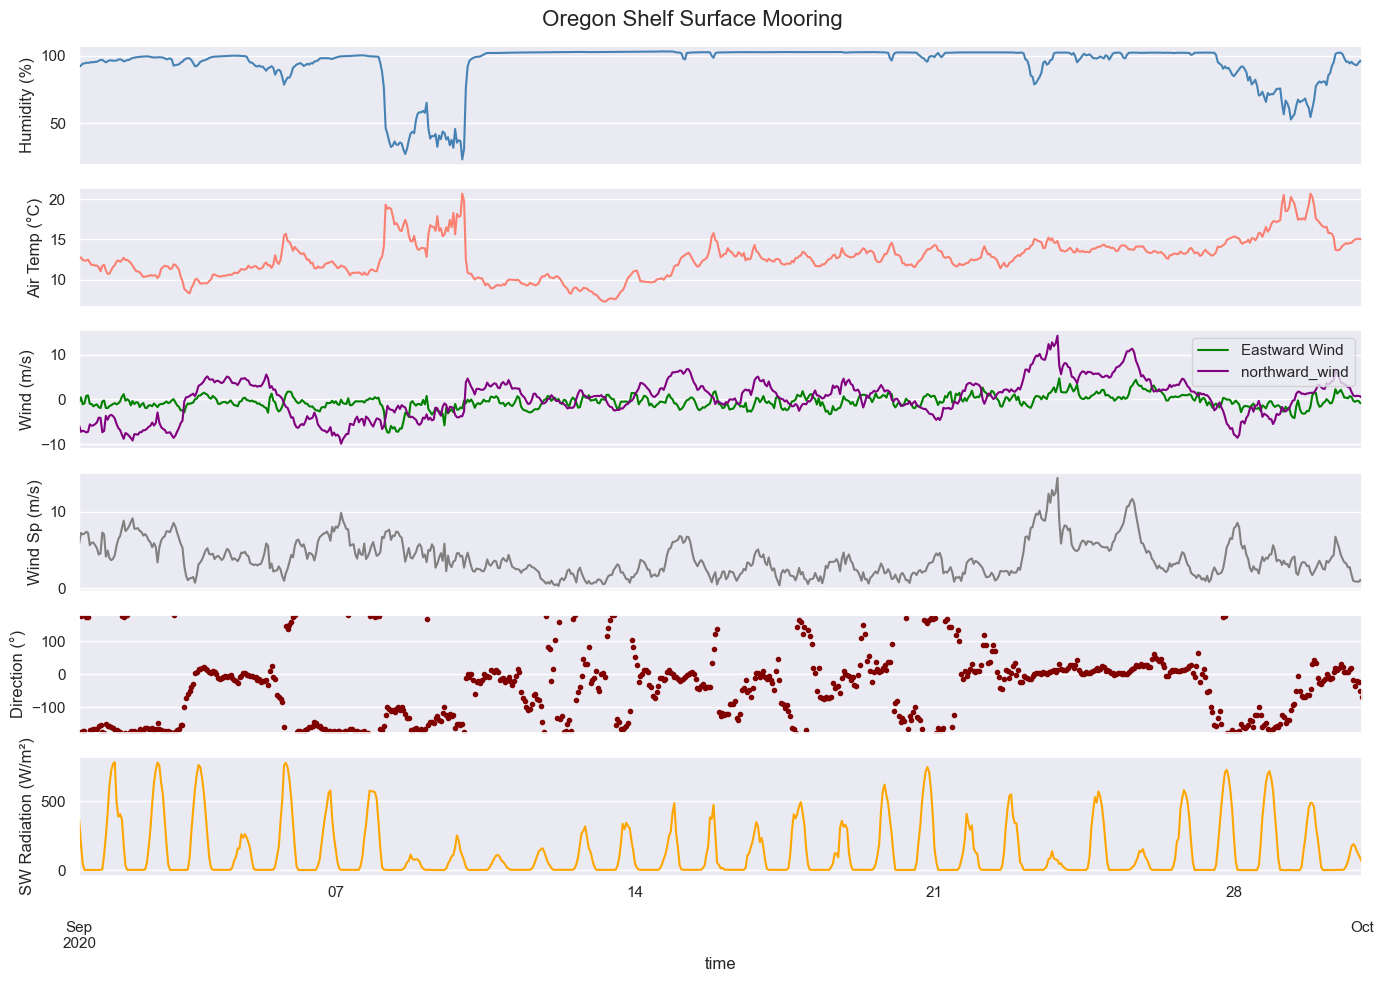

In [4]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 10), sharex=True)

df_url_ce02shsm['relative_humidity'].plot(ax=axes[0], color='steelblue')
axes[0].set_ylabel('Humidity (%)')

df_url_ce02shsm['air_temperature'].plot(ax=axes[1], color = 'salmon')
axes[1].set_ylabel('Air Temp (°C)')

df_url_ce02shsm['eastward_wind'].plot(ax=axes[2], color = 'green', label='Eastward Wind')
df_url_ce02shsm['northward_wind'].plot(ax=axes[2], color='purple', layout='Northward Wind')
axes[2].set_ylabel('Wind (m/s)')
ax2 = axes[2].legend()

df_url_ce02shsm['wind_speed'].plot(ax=axes[3], color = 'grey')
axes[3].set_ylabel('Wind Sp (m/s)')

df_url_ce02shsm['wind_direction'].plot(ax=axes[4], color = 'maroon', linestyle='', marker='.') 
axes[4].set_ylabel('Direction (°)')
axes[4].set_ylim(-180, 180)

df_url_ce02shsm['netsirr'].plot(ax=axes[5], color = 'orange')
axes[5].set_ylabel('SW Radiation (W/m²)')

fig.suptitle('Oregon Shelf Surface Mooring', fontsize=16)
fig.tight_layout()
plt.tight_layout()



In [5]:
# Save to CSV 
df_url_ce02shsm.to_csv('data/lab12_ce02shsm.csv', date_format='%Y-%m-%d %H:%M', float_format='%.3f')

## Activity 2 - Oregon Offshore Surface Mooring

In [6]:
# Load the FLORT data
url_ce04flort = e.get_download_url(
  dataset_id='ooi-ce04ossm-rid27-02-flortd000',
  variables=['time', 'cdomflo', 'mass_concentration_of_chlorophyll_a_in_sea_water', 'flubsct'],
  constraints={"time>=": "2020-09-01", "time<=": "2020-10-01"}
)
df_ce04flort = pd.read_csv(url_ce04flort, index_col='time', parse_dates=True, skiprows=[1])
df_ce04flort = df_ce04flort.resample('1h').mean()

# Load the Oxygen data
url_ce04dosta = e.get_download_url(
  dataset_id='ooi-ce04ossm-rid27-04-dostad000',
  variables=['time', 'mole_concentration_of_dissolved_molecular_oxygen_in_sea_water'],
  constraints={"time>=": "2020-09-01", "time<=": "2020-10-01"}
)
df_ce04dosta = pd.read_csv(url_ce04dosta, index_col='time', parse_dates=True, skiprows=[1])
df_ce04dosta = df_ce04dosta.resample('1h').mean()

# Load the Nitrate data
url_ce04nutnr = e.get_download_url(
  dataset_id='ooi-ce04ossm-rid26-07-nutnrb000',
  variables=['time', 'mole_concentration_of_nitrate_in_sea_water_suna'],
  constraints={"time>=": "2020-09-01", "time<=": "2020-10-01"}
)
df_ce04nutnr = pd.read_csv(url_ce04nutnr, index_col='time', parse_dates=True, skiprows=[1])
df_ce04nutnr = df_ce04nutnr.resample('1h').mean()

# Merge the averaged datasets together into one dataframe
df_merged = pd.concat([df_ce04flort, df_ce04dosta, df_ce04nutnr], axis=1)

# Display the merged dataframe
# df_merged.head()

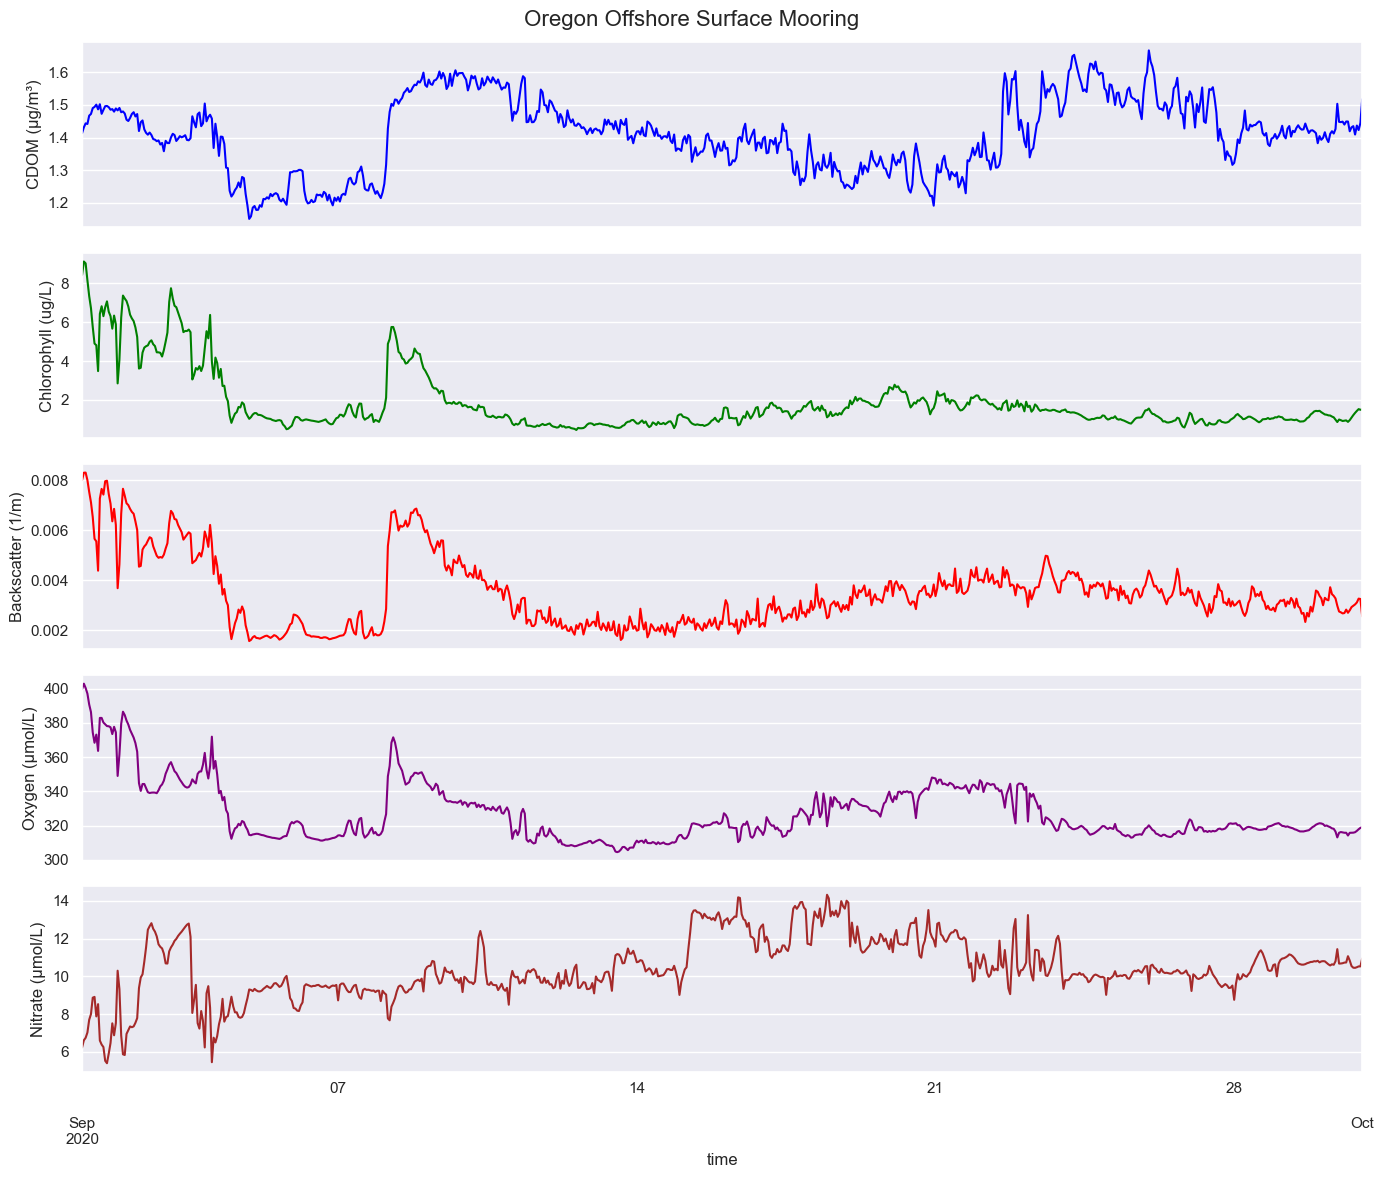

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 12), sharex=True)

df_merged['cdomflo'].plot(ax=axes[0], color='blue')
axes[0].set_ylabel('CDOM (µg/m³)')

df_merged['mass_concentration_of_chlorophyll_a_in_sea_water'].plot(ax=axes[1], color='green')
axes[1].set_ylabel('Chlorophyll (ug/L)')

df_merged['flubsct'].plot(ax=axes[2], color='red')
axes[2].set_ylabel('Backscatter (1/m)')

df_merged['mole_concentration_of_dissolved_molecular_oxygen_in_sea_water'].plot(ax=axes[3], color='purple')
axes[3].set_ylabel('Oxygen (µmol/L)')

df_merged['mole_concentration_of_nitrate_in_sea_water_suna'].plot(ax=axes[4], color='brown')
axes[4].set_ylabel('Nitrate (µmol/L)')
# axes[4].set_xlabel('Time')

fig.suptitle('Oregon Offshore Surface Mooring', fontsize=16)
fig.tight_layout()
plt.show()

In [8]:
# Save to CSV
df_merged.to_csv('data/lab12_ce04ossm.csv', date_format='%Y-%m-%d %H:%M', float_format='%.4f')

## Comparing Values
Let's compare a few variables.

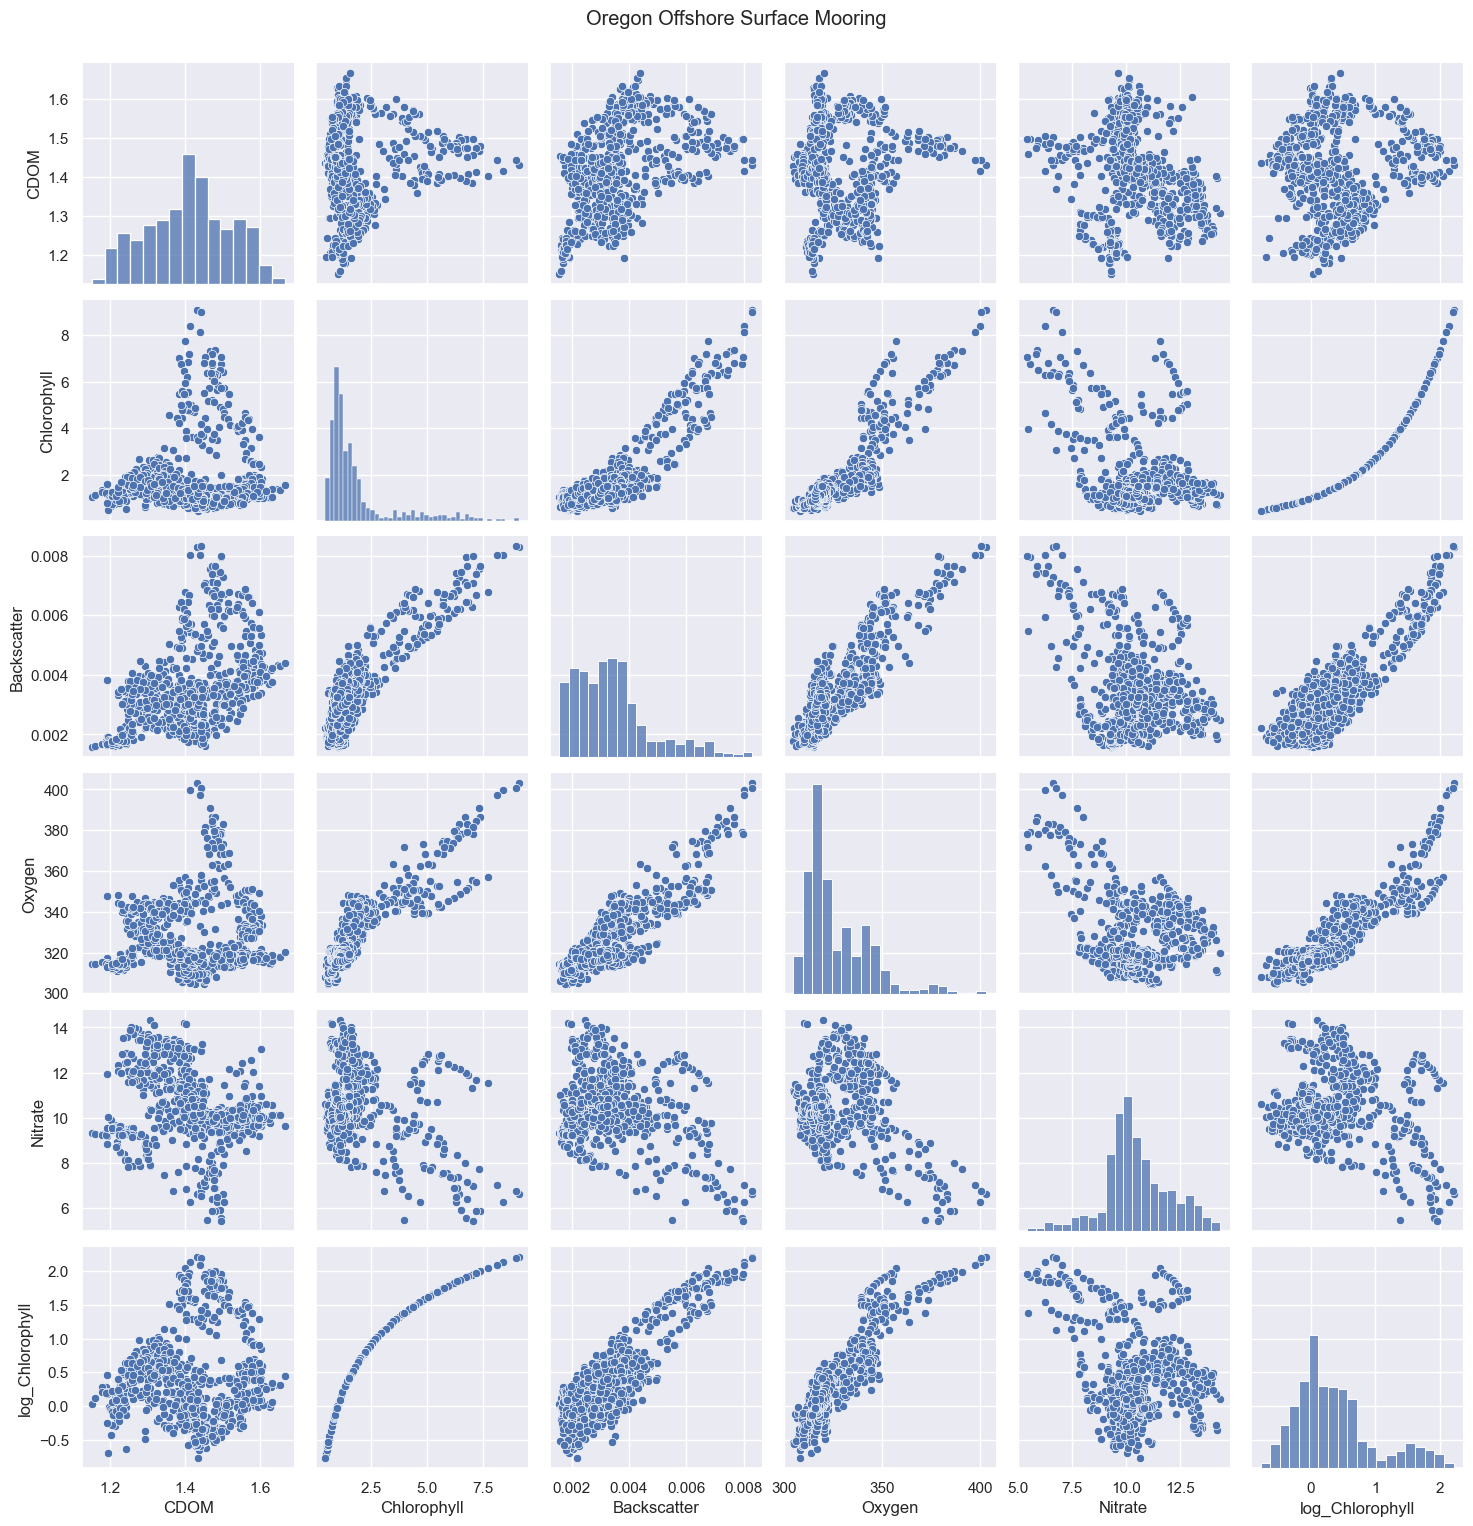

In [17]:
df_merged = df_merged.rename(columns={
    'cdomflo': 'CDOM',
    'mass_concentration_of_chlorophyll_a_in_sea_water': 'Chlorophyll',
    'flubsct': 'Backscatter',
    'mole_concentration_of_dissolved_molecular_oxygen_in_sea_water': 'Oxygen',
    'mole_concentration_of_nitrate_in_sea_water_suna': 'Nitrate'
})
df_merged['log_Chlorophyll'] = np.log(df_merged['Chlorophyll'])

sns.pairplot(df_merged)
plt.suptitle('Oregon Offshore Surface Mooring', y=1.02)
plt.savefig('data/lab12_ce04ossm_pairplot.png')
plt.show()
